In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


C:\Users\vldmr\AppData\Local\Temp\ipykernel_17524\1244993961.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Gross input data

snapshot_table_dir = "C:/Users/vldmr/OneDrive/Документы/DS Projects/Aviation/Data/edp data set 2024-01-29_reduced2/edp data set 2024-01-29_reduced2/edp acars snapshots 2024-01-18.csv"
reduced_table_dir = "C:/Users/vldmr/OneDrive/Документы/DS Projects/Aviation/Data/edp data set 2024-01-29_reduced2/edp data set 2024-01-29_reduced2/edp acars snapshots 2024-01-29_reduced.xlsx"
change_table_dir = "C:/Users/vldmr/OneDrive/Документы/DS Projects/Aviation/Data/edp data set 2024-01-29_reduced2/edp data set 2024-01-29_reduced2/edp changes 23.xlsx"

snapshot_table = pd.read_csv(snapshot_table_dir)
reduced_table = pd.read_excel(reduced_table_dir)
change_table = pd.read_excel(change_table_dir)


C:\Users\vldmr\AppData\Local\Temp\ipykernel_17524\1078736455.py:7: DtypeWarning: Columns (6,8,30) have mixed types. Specify dtype option on import or set low_memory=False.
  snapshot_table = pd.read_csv(snapshot_table_dir)


In [4]:
# Take valuable data from snapshots
s_table = snapshot_table.iloc[:, [1, 2, 14,15,16,17,18,19,20,21,22,23,24,25]]

In [5]:
# Take valuable data from incident table
c_table = change_table.iloc[:, [1,2,7]]

c_table = c_table.dropna(subset = 'position')

In [6]:
# Clean date and time of snapshots and repair to date format

s_table = s_table.dropna(subset =['AtCruise_HydSysPress_1'])
s_table = s_table.dropna(subset =['AtCruise_HydSysPress_2'])  # Found the lack of data also for pressure
s_table = s_table.dropna(subset =['AtCruise_HydSysPress_3'])
s_table = s_table.dropna(subset =['AtCruise_HydSysPress_4'])

s_table['message_date'] = pd.to_datetime(s_table['message_date'])
s_table = s_table[s_table['message_date'].dt.year < 2020]
s_table = s_table[2018 < s_table['message_date'].dt.year]
s_table['message_date'] = s_table['message_date'].dt.date

c_table['transaction_date'] = pd.to_datetime(c_table['transaction_date']).dt.date

In [7]:
# Convert data frames to numpy arrays

sa_table = s_table.iloc[1:].to_numpy()
ca_table = c_table.iloc[1:].to_numpy()

# Add column of incident in snapshot data
al_column = np.zeros((sa_table.shape[0],1))
sa_table = np.append(sa_table, al_column, axis=1)

# Add incident if airplane and data are matching
matches0 = np.isin(sa_table[:,0], ca_table[:,0])
matches1 = np.isin(sa_table[:,1], ca_table[:,1])
matches = matches0 & matches1
matching_rows = sa_table[matches]
sa_table[matches, -1] = 1.

In [8]:
# Separate sub-arrays by airplanes

column_index = 0

unique_values = np.unique(sa_table[:, column_index])
split_arrays = {}

for value in unique_values:
    split_arrays[value] = sa_table[sa_table[:, column_index] == value]

keys = list(split_arrays.keys())

# Test for separate tail

tail_no = 7

ap01 = split_arrays[keys[tail_no]]

In [9]:
# Data normalization for airplane01

#col_norm = [2,3,4,5,6,7,8,9,10,11,12,13]
#for col in col_norm:
#    col_mean = np.mean(ap01[:, col])
#    col_std = np.std(ap01[:, col])
#    ap01[:, col] = (ap01[:, col] - col_mean) / col_std
#print(ap01)

AIRPLANE13


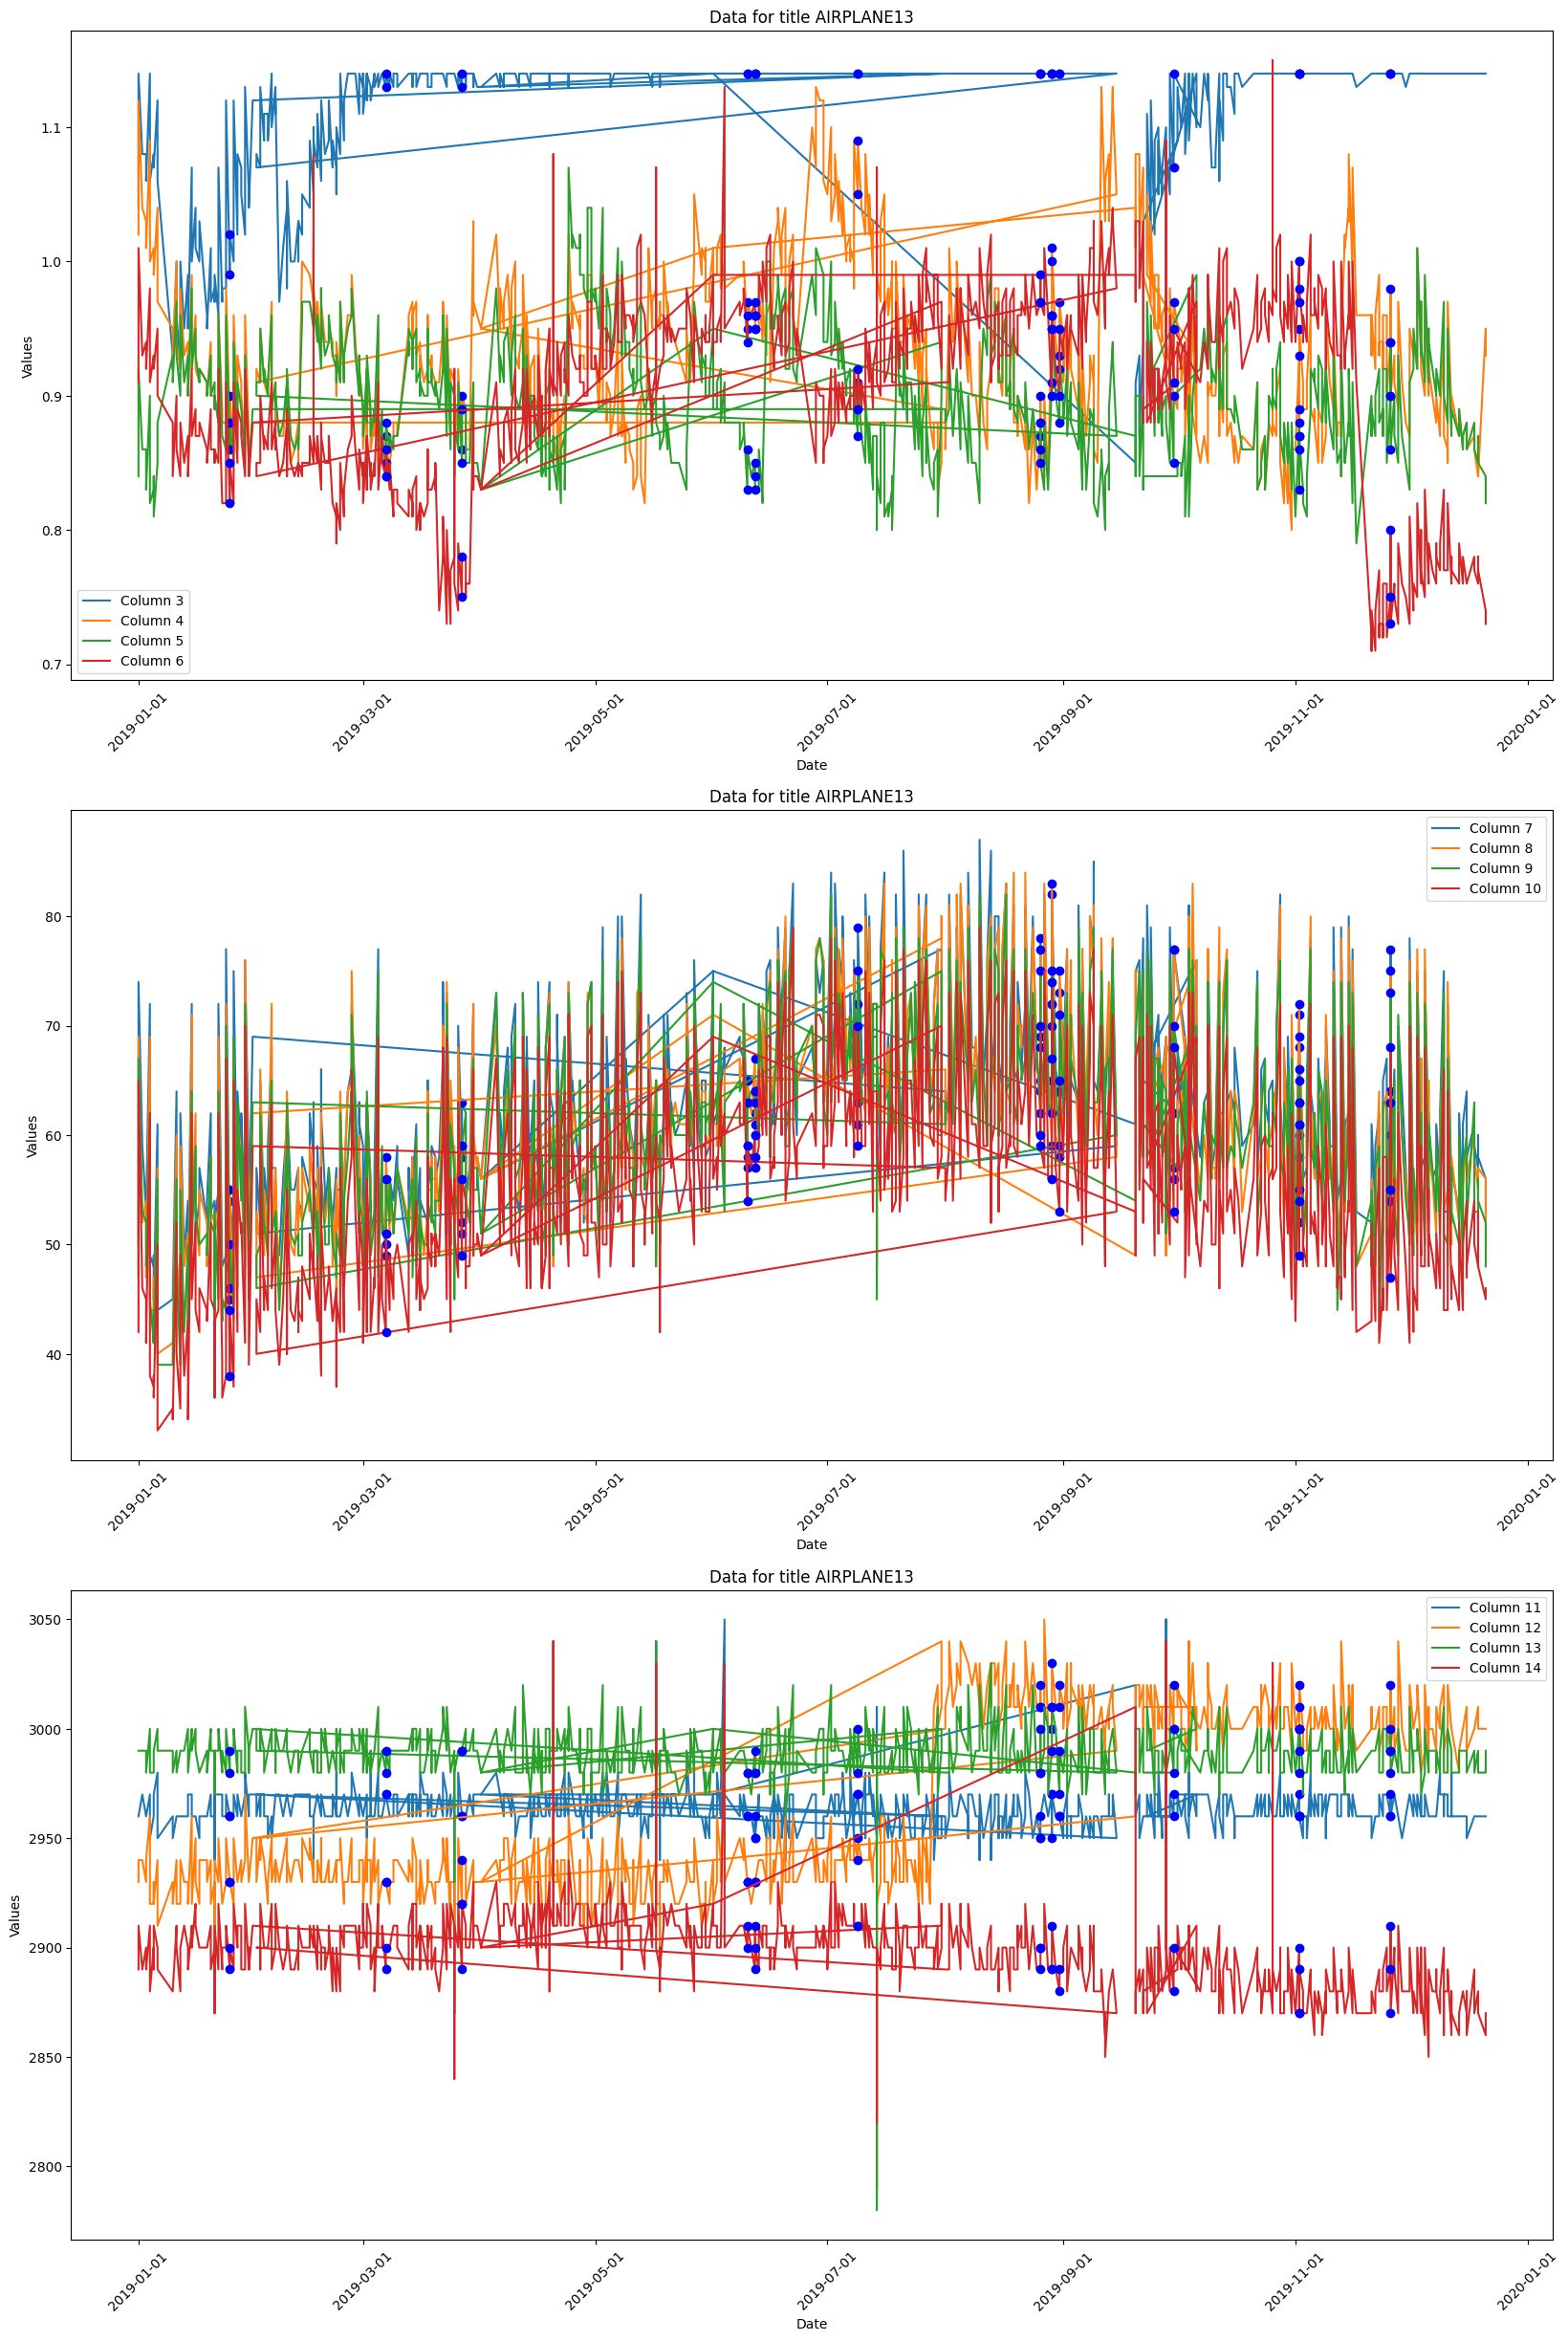

In [10]:
def plot_data(start_col, end_col, data, dates, ax, title):
    for col in range(start_col, end_col):
        ax.plot(dates, data[:, col], label=f'Column {col+1}')
        for idx, val in enumerate(data[:, col]):
            if data[idx, 14] == 1:  # Incident flag
                ax.plot(dates[idx], val, 'bo')  # Mark with red dot
    ax.legend()
    ax.set_title(f'Data for title {title}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Values')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

title = str(ap01[0,0])
data = ap01
print (title)
dates = ap01[:, 1]
fig, axs = plt.subplots(3, 1, figsize=(20, 30))

plot_data(2, 6, data, dates, axs[0], title)
plot_data(6, 10, data, dates, axs[1], title)
plot_data(10, 14, data, dates, axs[2], title)    

In [11]:
print(ca_table)

[['AIRPLANE12' datetime.date(2019, 1, 25) 1.0]
 ['AIRPLANE11' datetime.date(2019, 3, 7) 2.0]
 ['AIRPLANE14' datetime.date(2019, 3, 27) 1.0]
 ['AIRPLANE03' datetime.date(2019, 6, 10) 1.0]
 ['AIRPLANE12' datetime.date(2019, 6, 12) 4.0]
 ['AIRPLANE01' datetime.date(2019, 7, 9) 1.0]
 ['AIRPLANE03' datetime.date(2019, 8, 26) 2.0]
 ['AIRPLANE15' datetime.date(2019, 8, 29) 2.0]
 ['AIRPLANE17' datetime.date(2019, 8, 29) 1.0]
 ['AIRPLANE17' datetime.date(2019, 8, 31) 1.0]
 ['AIRPLANE15' datetime.date(2019, 9, 30) 3.0]
 ['AIRPLANE12' datetime.date(2019, 11, 2) 4.0]
 ['AIRPLANE12' datetime.date(2019, 11, 26) 3.0]
 ['AIRPLANE13' datetime.date(2020, 1, 14) 4.0]]


In [16]:
print(sa_table[:10])

[['AIRPLANE01' datetime.date(2019, 1, 4) 0.9 1.16 0.92 1.05 74 53 46 66
  2910 3000 2970 2940 0.0]
 ['AIRPLANE01' datetime.date(2019, 1, 4) 0.93 1.16 0.96 1.08 71 61 56 72
  2900 2980 2990 2940 0.0]
 ['AIRPLANE01' datetime.date(2019, 1, 5) 0.94 1.16 0.95 1.07 67 56 45 68
  2910 2980 2980 2940 0.0]
 ['AIRPLANE01' datetime.date(2019, 1, 5) 0.9 1.16 0.92 1.03 63 52 47 63
  2900 2990 2990 2950 0.0]
 ['AIRPLANE01' datetime.date(2019, 1, 5) 0.9 1.16 0.9 1.03 71 50 44 63
  2900 2990 2990 2960 0.0]
 ['AIRPLANE01' datetime.date(2019, 1, 5) 0.9 1.16 0.9 1.03 69 49 45 60
  2900 2990 2990 2940 0.0]
 ['AIRPLANE01' datetime.date(2019, 1, 6) 0.88 1.16 0.89 1.02 72 50 44 62
  2910 2980 2980 2950 0.0]
 ['AIRPLANE01' datetime.date(2019, 1, 6) 0.94 1.16 0.94 1.08 77 61 54 75
  2900 3000 2980 2940 0.0]
 ['AIRPLANE01' datetime.date(2019, 1, 7) 0.91 1.16 0.91 1.05 71 53 49 67
  2890 2980 2970 2950 0.0]
 ['AIRPLANE01' datetime.date(2019, 1, 7) 0.85 1.16 0.87 1.01 67 48 38 59
  2920 2980 2970 2950 0.0]]


In [14]:
sa_table.shape

(8806, 15)